In [1]:
RANDOM_SEED = 1

In [11]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
import pandas_profiling
    
get_ipython().magic(u'matplotlib inline')
#these are some options to control output on your screen 
pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 50) 
pd.set_option('display.width', 120)

/Applications/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Applications/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Applications/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Applications/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, 

In [3]:
import os 

#Change current working directory
os.chdir('/Users/dalyaadams/desktop')

In [5]:
#import the data file
bank = pd.read_csv('bank.csv', sep=';')

In [6]:
bank.head()

   age          job  marital  education default  balance housing loan   contact  day month  duration  campaign  pdays  \
0   30   unemployed  married    primary      no     1787      no   no  cellular   19   oct        79         1     -1   
1   33     services  married  secondary      no     4789     yes  yes  cellular   11   may       220         1    339   
2   35   management   single   tertiary      no     1350     yes   no  cellular   16   apr       185         1    330   
3   30   management  married   tertiary      no     1476     yes  yes   unknown    3   jun       199         4     -1   
4   59  blue-collar  married  secondary      no        0     yes   no   unknown    5   may       226         1     -1   

   previous poutcome response  
0         0  unknown       no  
1         4  failure       no  
2         1  failure       no  
3         0  unknown       no  
4         0  unknown       no  

In [7]:
print('')
print('----- Summary of Input Data -----')
print('')

# show the object is a DataFrame
print('Object type: ', type(bank))
print('')
# show number of observations in the DataFrame
print('Number of observations: ', len(bank))
print('')
# show variable names
print('Variable names: ', bank.columns)


----- Summary of Input Data -----

Object type:  <class 'pandas.core.frame.DataFrame'>

Number of observations:  4521

Variable names:  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')


In [8]:
#show variable names, observations for each, data type for each
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
response     4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [9]:
# show descriptive statistics
bank.describe()

               age       balance          day     duration     campaign        pdays     previous
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000  4521.000000  4521.000000
mean     41.170095   1422.657819    15.915284   263.961292     2.793630    39.766645     0.542579
std      10.576211   3009.638142     8.247667   259.856633     3.109807   100.121124     1.693562
min      19.000000  -3313.000000     1.000000     4.000000     1.000000    -1.000000     0.000000
25%      33.000000     69.000000     9.000000   104.000000     1.000000    -1.000000     0.000000
50%      39.000000    444.000000    16.000000   185.000000     2.000000    -1.000000     0.000000
75%      49.000000   1480.000000    21.000000   329.000000     3.000000    -1.000000     0.000000
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   871.000000    25.000000

In [10]:
# How many Null values?
len(bank.index)-bank.count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [12]:
#create a profile report and view it
profile=pandas_profiling.ProfileReport(bank)
profile

Number of variables,17
Number of observations,4521
Total Missing (%),0.0%
Total size in memory,600.5 KiB
Average record size in memory,136.0 B
Numeric,7
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [13]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T




In [14]:
# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)

(4521, 4)


In [15]:
# cross-validation scoring code adapted from Scikit Learn documentation
from sklearn.metrics import roc_auc_score

# specify the set of classifiers being evaluated
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

In [16]:
names = ["Naive_Bayes", "Logistic_Regression"]
classifiers = [BernoulliNB(alpha=1.0, binarize=0.5, 
                           class_prior = [0.5, 0.5], fit_prior=False), 
               LogisticRegression()]

In [17]:
# --------------------------------------------------------
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
N_FOLDS = 10

In [18]:
# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

In [19]:
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable    
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, clf in zip(names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        clf.fit(X_train, y_train)  # fit on the train set for this fold
        # evaluate on the test set for this fold
        y_test_predict = clf.predict_proba(X_test)
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) 
        print('Area under ROC curve:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names





Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4068, 3)
X_test: (453, 3)
y_train: (4068,)
y_test: (453,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5878522062732588

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.5878522062732588

Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  S

In [20]:
print('\n----------------------------------------------')
#print('Average results from ', N_FOLDS, '-fold cross-validation\n',
#      '\nMethod                 Area under ROC Curve', sep = '')     
print(cv_results_df.mean())  


----------------------------------------------
Naive_Bayes            0.611060
Logistic_Regression    0.611733
dtype: float64


In [21]:
# --------------------------------------------------------
# Select method and apply to specific test cases
# --------------------------------------------------------
my_default = np.array([1, 1, 1, 1, 0, 0, 0, 0], np.int32)
my_housing = np.array([1, 1, 0, 0, 1, 1, 0, 0], np.int32)
my_loan = np.array([1, 0, 1, 0, 1, 0, 1, 0], np.int32)

my_X_test = np.vstack([my_default, my_housing, my_loan]).T




In [22]:
# fit logistic regression to full data set
clf = LogisticRegression()
X_train = model_data[:, 0:model_data.shape[1]-1]
y_train = model_data[:, model_data.shape[1]-1]
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# predict specific test cases
y_my_test_predict = clf.predict_proba(my_X_test)

In [24]:
# create DataFrame for displaying test cases and predicted probabilities
my_targeting_df = pd.DataFrame(np.hstack([my_X_test, y_my_test_predict]))
my_targeting_df.columns = ['default', 'housing', 'loan', 
                           'predict_NO', 'predict_YES']
print('\n\nLogistic regression model predictions for test cases:')
print(my_targeting_df) 



Logistic regression model predictions for test cases:
   default  housing  loan  predict_NO  predict_YES
0      1.0      1.0   1.0    0.945729     0.054271
1      1.0      1.0   0.0    0.892349     0.107651
2      1.0      0.0   1.0    0.900786     0.099214
3      1.0      0.0   0.0    0.811988     0.188012
4      0.0      1.0   1.0    0.953277     0.046723
5      0.0      1.0   0.0    0.906588     0.093412
6      0.0      0.0   1.0    0.914016     0.085984
7      0.0      0.0   0.0    0.834890     0.165110


In [25]:
from sklearn.cross_validation import train_test_split

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
bank_data= bank[['default','housing', 'loan']].copy()
Y=bank[['response']].copy()

In [27]:
bank_data['default']=bank_data['default'].map(convert_to_binary)
bank_data['housing']=bank_data['housing'].map(convert_to_binary)
bank_data['loan']=bank_data['loan'].map(convert_to_binary)




In [28]:
Y['response']=Y['response'].map(convert_to_binary)

In [29]:
Y['response'].value_counts()

0    4000
1     521
Name: response, dtype: int64

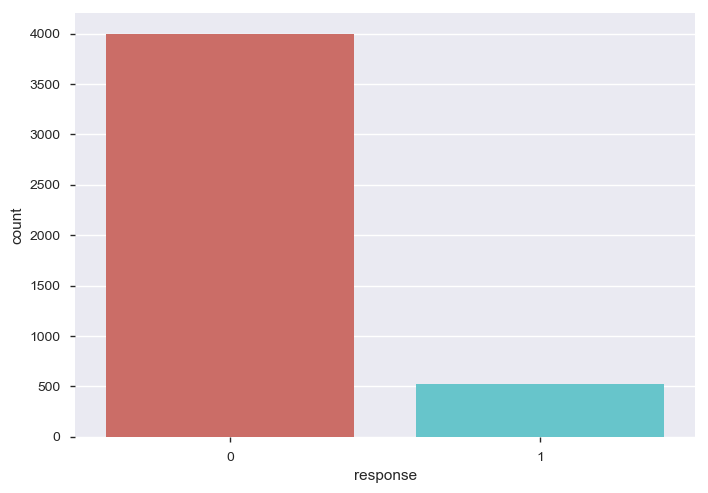

<Figure size 800x550 with 0 Axes>

In [30]:
sns.countplot(x='response', data = Y, palette='hls')
plt.show()
plt.savefig('count_plot')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
...     bank_data, Y, test_size=0.33, random_state=42)

In [32]:
#Run Logisitc regression on the training sets
# fit logistic regression to full data set
logi = LogisticRegression()
result=logi.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
#How do I view the decisions?

result.coef_

array([[ 0.29867304, -0.67169042, -0.53982123]])

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(result, X_train, y_train, cv=10, scoring="accuracy")
 

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

array([0.87828947, 0.87828947, 0.87828947, 0.88118812, 0.88118812,
       0.88118812, 0.8807947 , 0.8807947 , 0.8807947 , 0.8807947 ])

In [35]:
predictions=result.predict(X_test)

In [36]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(result, X_train, y_train, cv=10)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [37]:
score=result.score(X_test, y_test)
score

0.8941018766756033

In [38]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[1334,    0],
       [ 158,    0]])

In [39]:
confusion_matrix(y_train, y_train_pred)

array([[2666,    0],
       [ 363,    0]])

In [40]:
from sklearn.metrics import precision_score, recall_score


precision_score(y_test, predictions)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [41]:

precision_score(y_train, y_train_pred)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [42]:
recall_score(y_test, predictions)

0.0

In [43]:
recall_score(y_train, y_train_pred)

0.0

In [44]:
y_scores = cross_val_predict(result, X_train, y_train, cv=10,
                             method="decision_function")

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

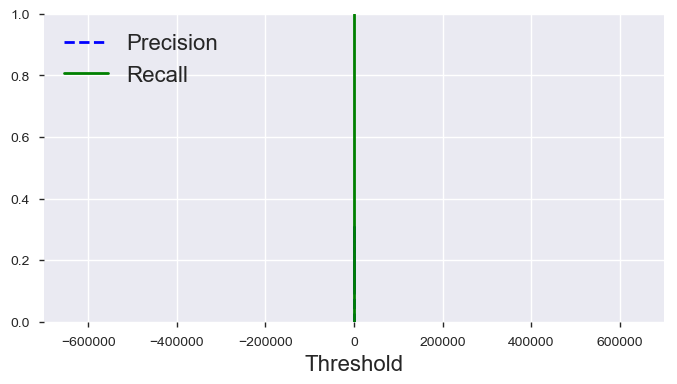

<Figure size 800x550 with 0 Axes>

In [47]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()
plt.savefig('log_P_R')

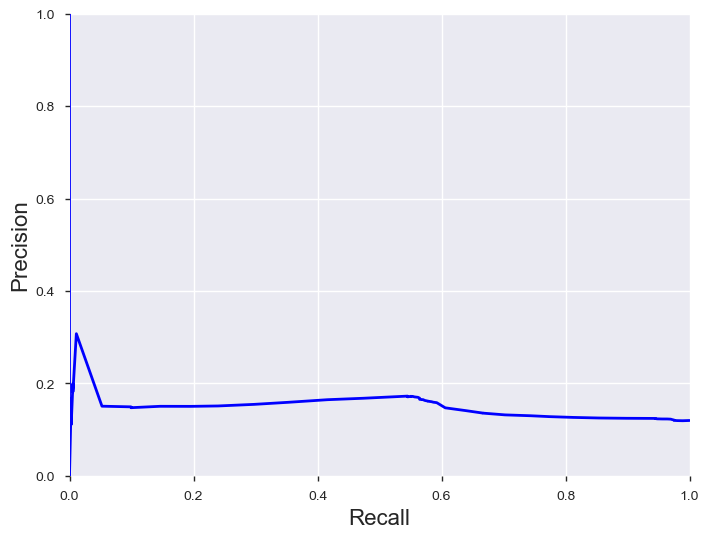

<Figure size 800x550 with 0 Axes>

In [51]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
#save_fig("precision_vs_recall_plot")
plt.show()
plt.savefig('log_precision_vs_recall_plot')

In [49]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

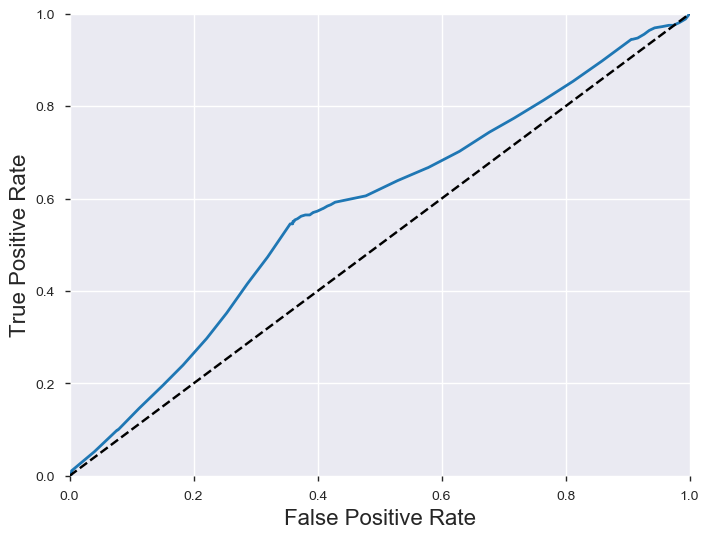

<Figure size 800x550 with 0 Axes>

In [50]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()
plt.savefig('log_roc_curve_plot')

In [52]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.5761419693766416

In [53]:
nbay=BernoulliNB()
nbayfit=nbay.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
Y_score=nbayfit.predict_proba(X_train)

In [55]:
nbayfit.coef_

array([[-3.82045581, -0.88926206, -2.28897944]])

In [56]:
cross_val_score(nbayfit, X_train, y_train, cv=10, scoring="accuracy")
 

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

array([0.87828947, 0.87828947, 0.87828947, 0.88118812, 0.88118812,
       0.88118812, 0.8807947 , 0.8807947 , 0.8807947 , 0.8807947 ])

In [57]:
nb_y_train_pred = cross_val_predict(nbayfit, X_train, y_train, cv=10)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [58]:
confusion_matrix(y_train, nb_y_train_pred)

array([[2666,    0],
       [ 363,    0]])

In [59]:
precision_score(y_train, nb_y_train_pred)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [60]:
recall_score(y_train, nb_y_train_pred)

0.0

In [61]:
precisions, recalls, thresholds = precision_recall_curve(y_train, Y_score[:,1])

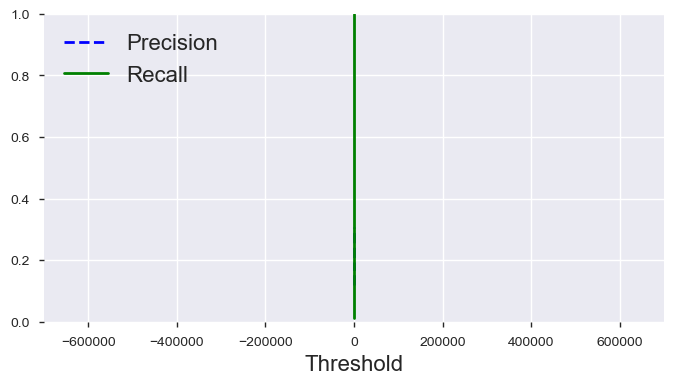

<Figure size 800x550 with 0 Axes>

In [62]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()
plt.savefig('nb_precision_recall_vs_threshold_plot')

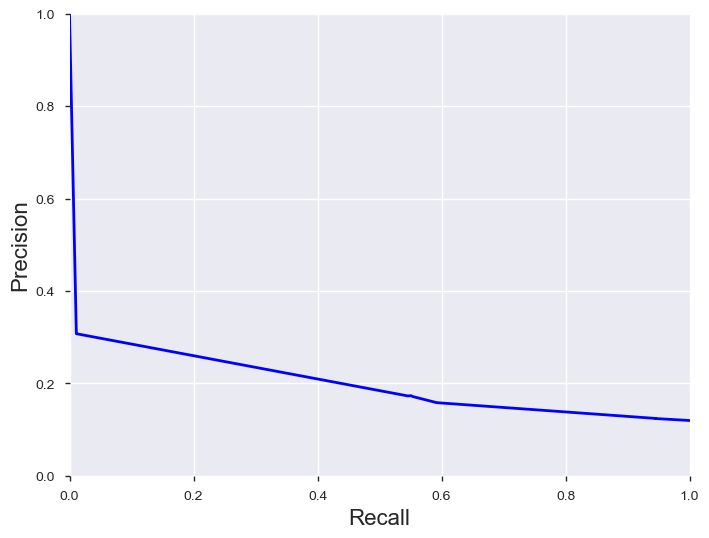

<Figure size 800x550 with 0 Axes>

In [63]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
#save_fig("precision_vs_recall_plot")
plt.show()
plt.savefig('nb_precision_vs_recall_plot')

In [64]:
fpr, tpr, thresholds = roc_curve(y_train, Y_score[:,1])

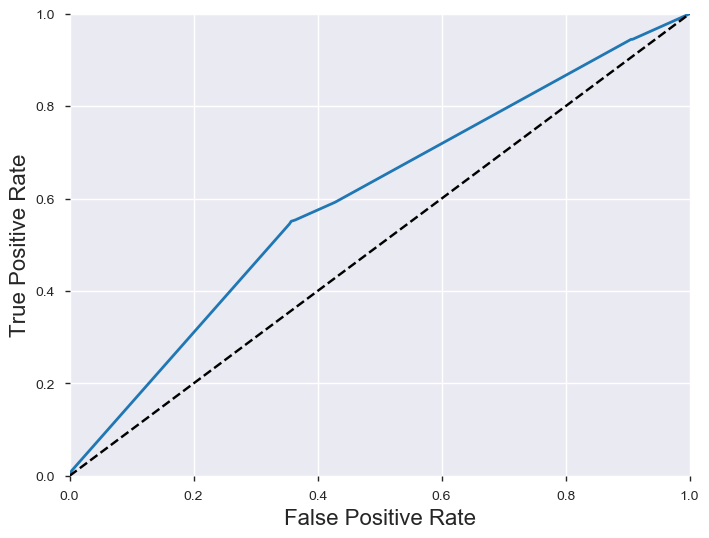

<Figure size 800x550 with 0 Axes>

In [65]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()
plt.savefig('nb_roc_curve_plot')

In [66]:
roc_auc_score(y_train, Y_score[:,1])

0.5982306527044984